# Training Dataset

In [73]:
import pandas as pd
import numpy as np
import json

from collections import defaultdict
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from spacy.lang.en import English

from nltk import word_tokenize
import re
from keras.preprocessing.text import Tokenizer
from nltk.stem.porter import PorterStemmer
import tensorflow as tf 

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

import string
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences

In [74]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE
        
        
file_name = '/Users/kritya/Downloads/Books_large.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review["reviewText"], review["overall"]))
        
print('Review : \n', reviews[0].text)
print('Sentiment :', reviews[0].sentiment)

Review : 
 I bought both boxed sets, books 1-5.  Really a great series!  Start book 1 three weeks ago and just finished book 5.  Sloane Monroe is a great character and being able to follow her through both private life and her PI life gets a reader very involved!  Although clues may be right in front of the reader, there are twists and turns that keep one guessing until the last page!  These are books you won't be disappointed with.
Sentiment : POSITIVE


In [75]:
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        neutral = list(filter(lambda x: x.sentiment == Sentiment.NEUTRAL, self.reviews))
        positive_shrunk = positive[:len(negative)]
        neutral_shrunk = neutral[:len(negative)]
        self.reviews = negative + positive_shrunk + neutral_shrunk
        np.random.shuffle(self.reviews)

In [76]:
reviews_container = ReviewContainer(reviews)

#reviews_container.evenly_distribute()
text = reviews_container.get_text()
sentiment = reviews_container.get_sentiment()

In [77]:
Train_DS = pd.DataFrame({
    'Reviews':text,
    'Sentiment':sentiment
})

In [78]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

types = ('POSITIVE', 'NEUTRAL', 'NEGATIVE')
labelencoder = LabelEncoder()
Train_DS['Label'] = labelencoder.fit_transform(Train_DS['Sentiment'])

In [83]:
embarked_dummies = pd.get_dummies(Train_DS.Sentiment)
Train_DS = pd.concat([Train_DS, embarked_dummies], axis=1)

In [84]:
Train_DS

,Reviews,Sentiment,Label,NEGATIVE,NEUTRAL,POSITIVE
0,"I bought both boxed sets, books 1-5. Really a...",POSITIVE,2,0,0,1
1,I enjoyed this short book. But it was way way ...,NEUTRAL,1,0,1,0
2,I love Nicholas Sparks. I&#8217;ve read everyt...,POSITIVE,2,0,0,1
3,I really enjoyed this adventure and look forwa...,POSITIVE,2,0,0,1
4,It was a decent read.. typical story line. Not...,NEUTRAL,1,0,1,0
...,...,...,...,...,...,...
9995,The whole series was great! Melody is a fanta...,POSITIVE,2,0,0,1
9996,I didn't thing that much of this book. I am a...,NEUTRAL,1,0,1,0
9997,It is an emotional TRIP to the past with Trip ...,POSITIVE,2,0,0,1
9998,This definitely got under my veins whereby I h...,POSITIVE,2,0,0,1


# Test Dataset

In [79]:
df1 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook1.csv")
df2 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook2.csv")
df3 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook3.csv")
df4 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook4.csv")
df5 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook5.csv")
df6 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook6.csv")
df7 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook7.csv")
df8 = pd.read_csv("/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/FYP - FlipBook8.csv")

In [80]:
# Appending Dataset
frame = [df1, df2, df3, df4, df5, df6, df7, df8]
Test_DS = pd.DataFrame()

for df in frame:
    Test_DS = Test_DS.append(df)

In [81]:
Test_DS

,Unnamed: 0,product_id,name,rating,summary,review
0,0,9788129135490,Five Point Someone ; What Not To Do At Iit,2,Dime novel through and through,I first read it a good six years ago and had l...
1,1,9788129135490,Five Point Someone ; What Not To Do At Iit,5,I WOULD LOVE TO READ IT AGAIN AND AGAIN AS IT ...,ACTUALLY I READ THE BOOK WHEN IT WAS RELEASED ...
2,2,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Brilliant,"Absolutely the top of the shelf. 3 Idiots, the..."
3,3,9788129135490,Five Point Someone ; What Not To Do At Iit,3,3 idiots better than the book!!!,This is a great book for IITans.THe book has a...
4,4,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Super!,Exceptionally well.The book needs no introduct...
...,...,...,...,...,...,...
1850,1850,9781542094139,One Arranged Murder,5,Perfect product!,Loved this book alot... Thank you chetan bhaga...
1851,1851,9781542094139,One Arranged Murder,5,Just wow!,Most awaited 🌼
1852,1852,9781542094139,One Arranged Murder,5,Excellent,Well packed and delivered on time...Loved read...
1853,1853,9781542094139,One Arranged Murder,5,Worth every penny,Worth the moneyNeat and fast delivery 😍 (took ...


In [85]:
Test_DS = Test_DS.drop(columns=['Unnamed: 0'])
Test_DS.reset_index(inplace = True, drop = True)

In [86]:
Test_DS

,product_id,name,rating,summary,review
0,9788129135490,Five Point Someone ; What Not To Do At Iit,2,Dime novel through and through,I first read it a good six years ago and had l...
1,9788129135490,Five Point Someone ; What Not To Do At Iit,5,I WOULD LOVE TO READ IT AGAIN AND AGAIN AS IT ...,ACTUALLY I READ THE BOOK WHEN IT WAS RELEASED ...
2,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Brilliant,"Absolutely the top of the shelf. 3 Idiots, the..."
3,9788129135490,Five Point Someone ; What Not To Do At Iit,3,3 idiots better than the book!!!,This is a great book for IITans.THe book has a...
4,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Super!,Exceptionally well.The book needs no introduct...
...,...,...,...,...,...
15879,9781542094139,One Arranged Murder,5,Perfect product!,Loved this book alot... Thank you chetan bhaga...
15880,9781542094139,One Arranged Murder,5,Just wow!,Most awaited 🌼
15881,9781542094139,One Arranged Murder,5,Excellent,Well packed and delivered on time...Loved read...
15882,9781542094139,One Arranged Murder,5,Worth every penny,Worth the moneyNeat and fast delivery 😍 (took ...


In [87]:
label_dict ={1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
Test_DS['label']= Test_DS.rating.map(label_dict)
Test_DS

,product_id,name,rating,summary,review,label
0,9788129135490,Five Point Someone ; What Not To Do At Iit,2,Dime novel through and through,I first read it a good six years ago and had l...,Negative
1,9788129135490,Five Point Someone ; What Not To Do At Iit,5,I WOULD LOVE TO READ IT AGAIN AND AGAIN AS IT ...,ACTUALLY I READ THE BOOK WHEN IT WAS RELEASED ...,Positive
2,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Brilliant,"Absolutely the top of the shelf. 3 Idiots, the...",Positive
3,9788129135490,Five Point Someone ; What Not To Do At Iit,3,3 idiots better than the book!!!,This is a great book for IITans.THe book has a...,Neutral
4,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Super!,Exceptionally well.The book needs no introduct...,Positive
...,...,...,...,...,...,...
15879,9781542094139,One Arranged Murder,5,Perfect product!,Loved this book alot... Thank you chetan bhaga...,Positive
15880,9781542094139,One Arranged Murder,5,Just wow!,Most awaited 🌼,Positive
15881,9781542094139,One Arranged Murder,5,Excellent,Well packed and delivered on time...Loved read...,Positive
15882,9781542094139,One Arranged Murder,5,Worth every penny,Worth the moneyNeat and fast delivery 😍 (took ...,Positive


In [88]:
types = ('POSITIVE', 'NEUTRAL', 'NEGATIVE')
labelencoder = LabelEncoder()
Test_DS['Label'] = labelencoder.fit_transform(Test_DS['label'])
Test_DS


embarked_dummies = pd.get_dummies(Test_DS.label)
Test_DS = pd.concat([Test_DS, embarked_dummies], axis=1)

In [95]:
Test_DS

,product_id,name,rating,summary,review,label,Negative,Neutral,Positive,clean_review,target
0,9788129135490,Five Point Someone ; What Not To Do At Iit,2,Dime novel through and through,I first read it a good six years ago and had l...,Negative,1,0,0,i first read good year ago had loved i st...,"Five Point Someone ; What Not To Do At Iit,2,D..."
1,9788129135490,Five Point Someone ; What Not To Do At Iit,5,I WOULD LOVE TO READ IT AGAIN AND AGAIN AS IT ...,ACTUALLY I READ THE BOOK WHEN IT WAS RELEASED ...,Positive,0,0,1,actually i read book wa released first i r...,"Five Point Someone ; What Not To Do At Iit,5,I..."
2,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Brilliant,"Absolutely the top of the shelf. 3 Idiots, the...",Positive,0,0,1,absolutely top shelf idiot movie based b...,"Five Point Someone ; What Not To Do At Iit,5,B..."
3,9788129135490,Five Point Someone ; What Not To Do At Iit,3,3 idiots better than the book!!!,This is a great book for IITans.THe book has a...,Neutral,0,1,0,is great book iitans book ha message s ...,"Five Point Someone ; What Not To Do At Iit,3,3..."
4,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Super!,Exceptionally well.The book needs no introduct...,Positive,0,0,1,exceptionally well book need introduction b...,"Five Point Someone ; What Not To Do At Iit,5,S..."
...,...,...,...,...,...,...,...,...,...,...,...
15879,9781542094139,One Arranged Murder,5,Perfect product!,Loved this book alot... Thank you chetan bhaga...,Positive,0,0,1,loved book alot thank chetan bhagat making ...,"One Arranged Murder,5,Perfect product!,Loved t..."
15880,9781542094139,One Arranged Murder,5,Just wow!,Most awaited 🌼,Positive,0,0,1,most awaited,"One Arranged Murder,5,Just wow!,Most awaited 🌼..."
15881,9781542094139,One Arranged Murder,5,Excellent,Well packed and delivered on time...Loved read...,Positive,0,0,1,well packed delivered time loved reading,"One Arranged Murder,5,Excellent,Well packed an..."
15882,9781542094139,One Arranged Murder,5,Worth every penny,Worth the moneyNeat and fast delivery 😍 (took ...,Positive,0,0,1,worth moneyneat fast delivery took only day ...,"One Arranged Murder,5,Worth every penny,Worth ..."


# Pre-processing

In [90]:
# Pre-processing

from nltk import pos_tag, word_tokenize
def posTag(review):
    tagged_text_list=[]
    for text in review:
        tagged_text_list.append(pos_tag(word_tokenize(text)))
    return tagged_text_list

def filterTag(tagged_review):
    final_text_list=[]
    for text_list in tagged_review:
        final_text=[]
        for word,tag in text_list:
            if tag in ['NN','NNS','NNP','NNPS','RB','RBR','RBS','JJ','JJR','JJS','VB','VBD','VBG','VBN','VBP','VBZ']:
                final_text.append(word)
        final_text_list.append(' '.join(final_text))
    return final_text_list

def clean_reviews(review):  
    
    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()

    # 4. POS tagging and filtering
    word_tokens = posTag(word_tokens)
    word_tokens = filterTag(word_tokens)
    
    # 5. Lemmetization
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [91]:
Train_DS['clean_review']= Train_DS['Reviews'].apply(clean_reviews)
Test_DS['clean_review']= Test_DS['review'].apply(clean_reviews)

In [92]:
Train_DS

,Reviews,Sentiment,Label,NEGATIVE,NEUTRAL,POSITIVE,clean_review
0,"I bought both boxed sets, books 1-5. Really a...",POSITIVE,2,0,0,1,i bought boxed set book really great series ...
1,I enjoyed this short book. But it was way way ...,NEUTRAL,1,0,1,0,i enjoyed short book wa way way short i s...
2,I love Nicholas Sparks. I&#8217;ve read everyt...,POSITIVE,2,0,0,1,i love nicholas spark i ve read everything s ...
3,I really enjoyed this adventure and look forwa...,POSITIVE,2,0,0,1,i really enjoyed adventure look forward rea...
4,It was a decent read.. typical story line. Not...,NEUTRAL,1,0,1,0,wa decent read typical story line nothing un...
...,...,...,...,...,...,...,...
9995,The whole series was great! Melody is a fanta...,POSITIVE,2,0,0,1,whole series wa great melody is fantastic wr...
9996,I didn't thing that much of this book. I am a...,NEUTRAL,1,0,1,0,i didn t thing much book i am boater lot...
9997,It is an emotional TRIP to the past with Trip ...,POSITIVE,2,0,0,1,is emotional trip past trip layla i love...
9998,This definitely got under my veins whereby I h...,POSITIVE,2,0,0,1,definitely got vein whereby i had purchase...


In [93]:
Test_DS

,product_id,name,rating,summary,review,label,Negative,Neutral,Positive,clean_review
0,9788129135490,Five Point Someone ; What Not To Do At Iit,2,Dime novel through and through,I first read it a good six years ago and had l...,Negative,1,0,0,i first read good year ago had loved i st...
1,9788129135490,Five Point Someone ; What Not To Do At Iit,5,I WOULD LOVE TO READ IT AGAIN AND AGAIN AS IT ...,ACTUALLY I READ THE BOOK WHEN IT WAS RELEASED ...,Positive,0,0,1,actually i read book wa released first i r...
2,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Brilliant,"Absolutely the top of the shelf. 3 Idiots, the...",Positive,0,0,1,absolutely top shelf idiot movie based b...
3,9788129135490,Five Point Someone ; What Not To Do At Iit,3,3 idiots better than the book!!!,This is a great book for IITans.THe book has a...,Neutral,0,1,0,is great book iitans book ha message s ...
4,9788129135490,Five Point Someone ; What Not To Do At Iit,5,Super!,Exceptionally well.The book needs no introduct...,Positive,0,0,1,exceptionally well book need introduction b...
...,...,...,...,...,...,...,...,...,...,...
15879,9781542094139,One Arranged Murder,5,Perfect product!,Loved this book alot... Thank you chetan bhaga...,Positive,0,0,1,loved book alot thank chetan bhagat making ...
15880,9781542094139,One Arranged Murder,5,Just wow!,Most awaited 🌼,Positive,0,0,1,most awaited
15881,9781542094139,One Arranged Murder,5,Excellent,Well packed and delivered on time...Loved read...,Positive,0,0,1,well packed delivered time loved reading
15882,9781542094139,One Arranged Murder,5,Worth every penny,Worth the moneyNeat and fast delivery 😍 (took ...,Positive,0,0,1,worth moneyneat fast delivery took only day ...


# 

# 

# CNN with GloVe

In [101]:
# Train Test Split

X_train = Train_DS['clean_review']
X_test = Test_DS['clean_review']

y_train = Train_DS[['NEGATIVE', 'NEUTRAL', 'POSITIVE']]
y_test = Test_DS[["Negative","Neutral", "Positive"]]

In [102]:
X_test

0        i first read   good  year ago  had loved  i st...
1        actually i read  book   wa released first  i r...
2        absolutely  top   shelf idiot  movie based   b...
3         is  great book  iitans  book ha  message   s ...
4        exceptionally well  book need  introduction  b...
                               ...                        
15879    loved  book alot thank  chetan bhagat  making ...
15880                                         most awaited
15881          well packed  delivered  time loved reading 
15882    worth  moneyneat  fast delivery took only day ...
15883    got  book today  big fan  chetan  state excell...
Name: clean_review, Length: 15884, dtype: object

In [103]:
y_test

,Negative,Neutral,Positive
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
15879,0,0,1
15880,0,0,1
15881,0,0,1
15882,0,0,1


In [104]:
# max length of review
maxi=-1
for i,rev in enumerate(Train_DS['clean_review']):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)

609


In [105]:
#Tokenize
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(Train_DS['clean_review'])
words_to_index = tok.word_index
encd_rev = tok.texts_to_sequences(Train_DS['clean_review'])

In [106]:
len(words_to_index)

27366

In [107]:
max_rev_len=609  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=50

In [108]:
from keras.preprocessing.sequence import pad_sequences
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape 

(10000, 609)

In [109]:
# GloVe

def read_glove_vector(glove_vec):
    with open(glove_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            w_line = line.split()
            curr_word = w_line[0]
            word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
    return word_to_vec_map

In [110]:
word_to_vec_map = read_glove_vector('/Users/kritya/Downloads/glove/glove.6B.50d.txt')

In [111]:
maxLen = max_rev_len

In [112]:
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras

In [113]:
vocab_len = len(words_to_index)+1
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
    embedding_vector = word_to_vec_map.get(word)
    if embedding_vector is not None:
        emb_matrix[index, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)

In [114]:
def conv1d_model_glove(input_shape):

    X_indices = Input(input_shape)

    embeddings = embedding_layer(X_indices)

    X = Conv1D(512,1,activation='relu')(embeddings)
  
    X = MaxPooling1D(1)(X)

    X = Conv1D(256,1,activation='relu')(X)
  
    X = MaxPooling1D(1)(X)

    X = Conv1D(256,1,activation='relu')(X)
    X = Dropout(0.8)(X)
    X = MaxPooling1D(1)(X)

    X = GlobalMaxPooling1D()(X)

    X = Dense(256, activation='relu')(X)
    X = Dense(3, activation='sigmoid')(X)

    model = Model(inputs=X_indices, outputs=X)

    return model

In [115]:
model_glove = conv1d_model_glove((maxLen,))
model_glove.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 609)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 609, 50)           1368350   
                                                                 
 conv1d_3 (Conv1D)           (None, 609, 512)          26112     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 609, 512)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 609, 256)          131328    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 609, 256)         0         
 1D)                                                       

In [117]:
import tensorflow as tf 
adam = tf.optimizers.Adam(learning_rate = 0.0001)
model_glove.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
tokenizer = Tokenizer()
X_train_indices = tokenizer.texts_to_sequences(X_train)

In [119]:
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen)
X_train_indices.shape

(10000, 609)

In [120]:
%%time

Glove_hist = model_glove.fit(X_train_indices, y_train, batch_size=128, epochs=10)

Epoch 1/10
79/79 [==============================] - 101s 1s/step - loss: 1.0948 - accuracy: 0.8281
Epoch 2/10
79/79 [==============================] - 102s 1s/step - loss: 1.0869 - accuracy: 0.8378
Epoch 3/10
79/79 [==============================] - 101s 1s/step - loss: 1.0791 - accuracy: 0.8378
Epoch 4/10
79/79 [==============================] - 101s 1s/step - loss: 1.0714 - accuracy: 0.8378
Epoch 5/10
79/79 [==============================] - 104s 1s/step - loss: 1.0638 - accuracy: 0.8378
Epoch 6/10
79/79 [==============================] - 102s 1s/step - loss: 1.0562 - accuracy: 0.8378
Epoch 7/10
79/79 [==============================] - 103s 1s/step - loss: 1.0488 - accuracy: 0.8378
Epoch 8/10
79/79 [==============================] - 103s 1s/step - loss: 1.0414 - accuracy: 0.8378
Epoch 9/10
79/79 [==============================] - 102s 1s/step - loss: 1.0341 - accuracy: 0.8378
Epoch 10/10
79/79 [==============================] - 102s 1s/step - loss: 1.0268 - accuracy: 0.8378
CPU times

In [121]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
tokenizer = Tokenizer()
X_test_indices = tokenizer.texts_to_sequences(X_test)

X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen)
X_test_indices.shape

(15884, 609)

In [129]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = model_glove.predict(X_test_indices, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
# y_test_label = np.argmax(y_test, axis=1)

# print(confusion_matrix(y_test, y_pred_bool))


249/249 [==============================] - 30s 120ms/step


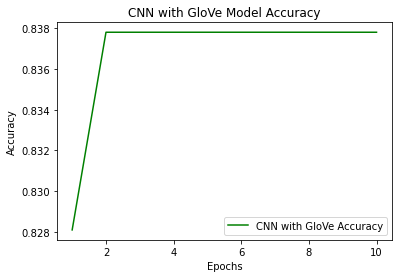

In [130]:
cnn_acc = Glove_hist.history['accuracy']
epochs = range(1,11)
plt.plot(epochs, cnn_acc, 'g', label='CNN with GloVe Accuracy')
plt.title('CNN with GloVe Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

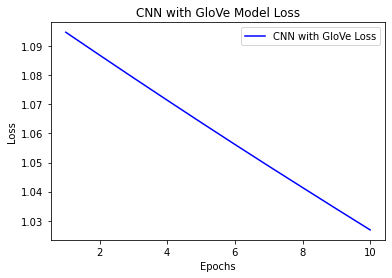

In [131]:
cnn_loss = Glove_hist.history['loss']
epochs = range(1,11)
plt.plot(epochs, cnn_loss, 'b', label='CNN with GloVe Loss')
plt.title('CNN with GloVe Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [132]:
# Saving Model Weights
model_glove.save_weights('/Users/kritya/Desktop/College/SEM 7/Project Phase 1/Dataset/CNN_GloVe_weights_3.hdf5')